In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models

2023-01-09 14:50:12.214462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
CK_PATH="CK_PLUS/CK+48" 
CK_PATH= pathlib.Path(CK_PATH)
image_count = len(list(CK_PATH.glob('*/*.png')))
print(image_count)

981


In [11]:
anger = list(CK_PATH.glob('anger/*'))
contempt = list(CK_PATH.glob('contempt/*'))
disgust = list(CK_PATH.glob('disgust/*'))
fear = list(CK_PATH.glob('fear/*'))
happy = list(CK_PATH.glob('happy/*'))
sadness = list(CK_PATH.glob('sadness/*'))
surprise = list(CK_PATH.glob('surprise/*'))
#PIL.Image.open(str(happy[0]))
#print image

In [12]:
batch_size = 32
img_height = 48
img_width = 48

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
CK_PATH,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 981 files belonging to 7 classes.
Using 785 files for training.


2023-01-09 14:54:20.735298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
class_names = train_ds.class_names
#print(class_names )


['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


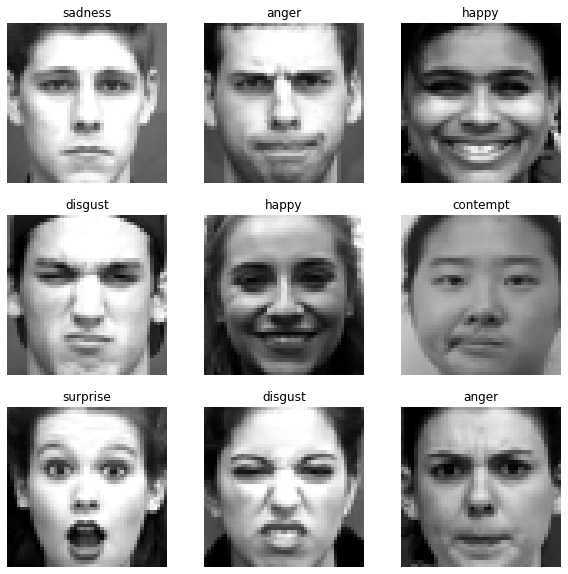

In [17]:
plt.figure(figsize=(10, 10)) #first 9 image with class
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 3)
(32,)


In [19]:
normalization_layer = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to be between 0 and 1

In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [ ]:
#max_value function for sharpening 
#----------------
#max_val


#---------------

In [41]:
#def relu(x): #ReLU Activation Function
 #   return(np.maximum(0, x))

ReLU_output=[]
for i in range(len(image_batch)):
    ReLU_output += [tf.keras.activations.relu(image_batch[i], max_value= max_val)] #testing value

In [41]:
#Batch Normalization
#----------------



#---------------